In [ ]:
import urllib.request, io, zipfile
import pandas as pd
import numpy as np

def read_data():
  url = 'https://archive.ics.uci.edu/static/public/352/online+retail.zip'
  remotezip = urllib.request.urlopen(url)
  zipinmemory = io.BytesIO(remotezip.read())
  zip = zipfile.ZipFile(zipinmemory)
  for fn in zip.namelist():
      if fn.endswith('xlsx'):
        df =  pd.read_excel(zip.read(fn))
        print(f'Successfully read {len(df)} rows from {fn} at {url}.')
        return df

df = read_data()

Successfully read 541909 rows from Online Retail.xlsx at https://archive.ics.uci.edu/static/public/352/online+retail.zip.




---



### Question 1:
We plan to invite our 50 best customers to a party. Who are they based on the data?


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Check for negative values
len(df[df['Quantity'] < 0])

10624

In [ ]:
# Check for NaN values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

To find the "best" customers, we must first define what "best" implies. The following are some examples of how to define a company's best customers:

- **Total Revenue:** Customers who have earned the greatest money.
- **Frequency:** Customers who have purchased the most items.
- **Average Transaction Value:** Customers who make higher-value purchases on average.

For the purposes of this response, I'll presume that "best" refers to the customers who generate the most revenue. This would entail estimating each customer's entire expenditure.


To determine each customer's total expenditure:

- We will establish a new column 'TotalPrice' in the dataframe which is a product of 'Quantity' and 'UnitPrice'.
- The dataframe should be grouped by 'CustomerID' and the 'TotalPrice' column should be added together.
- Sort the consumers in descending order based on this cumulative value.
- Get the top 50 customers.


Before this, some preprocessing is required to handle missing and negatve values in both the columns.

In [ ]:
import pandas as pd

df_new = df[df['Quantity'] > 0]
df_new = df_new.dropna(subset=['CustomerID'])
df_new['TotalPrice'] = df_new['Quantity'] * df_new['UnitPrice']
customer_expenditure_df = df_new.groupby('CustomerID').sum()['TotalPrice'].reset_index()
customer_expenditure_df.columns = ['CustomerID', 'Expenditures']

<ipython-input-3-4a6804ec71a8>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer_expenditure_df = df_new.groupby('CustomerID').sum()['TotalPrice'].reset_index()


In [ ]:
top_50_customers_df = customer_expenditure_df.sort_values(by='Expenditures', ascending=False).head(50)
top_50_customers_df.head()

,CustomerID,Expenditures
1690,14646.0,280206.02
4202,18102.0,259657.30
3729,17450.0,194550.79
3009,16446.0,168472.50
1880,14911.0,143825.06


Frequency: Customers who have purchased the most items.

In [ ]:
df_new1 = df[df['Quantity'] > 0]
df_new1 = df_new1.dropna(subset=['CustomerID'])
# df_new1.groupby('CustomerID')
# df_new1 = df_new1.groupby('CustomerID').sum().reset_index()
# df_new1.head()
# df_new1['CustomerID'].value_counts()
purchase_frequency = df_new1.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
purchase_frequency.columns = ['CustomerID', 'Frequency']
purchase_frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [ ]:
# Sorting the customers by their purchase frequency in descending order and getting the top 5
top5_customers_df = purchase_frequency.sort_values(by='Frequency', ascending=False).head(5)
top5_customers_df

,CustomerID,Frequency
326,12748.0,210
1880,14911.0,201
4011,17841.0,124
562,13089.0,97
1662,14606.0,93


In [ ]:
df.groupby('CustomerID')['InvoiceNo'].unique()

CustomerID
12346.0                                    [541431, C541433]
12347.0    [537626, 542237, 549222, 556201, 562032, 57351...
12348.0                     [539318, 541998, 548955, 568172]
12349.0                                             [577609]
12350.0                                             [543037]
                                 ...                        
18280.0                                             [545712]
18281.0                                             [556464]
18282.0                            [562525, C562808, 580173]
18283.0    [540350, 541854, 545079, 550957, 554157, 55673...
18287.0                             [554065, 570715, 573167]
Name: InvoiceNo, Length: 4372, dtype: object

In [ ]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df_new.shape

(397924, 9)

### Question 2:
Some products, such as body lotion, can run out after a while and the buyer would need to replace it. The company wishes to send a follow-up email to clients to remind them to replenish particular products.

Your objective is to rapidly determine whether the available data supports the business case as described:

* What are the top five products with the highest repurchase rate (i.e. being purchased multiple times by the same customer)?

* What is the average repurchase frequency for a certain product?





---



**1. What are the 5 products with the highest re-purchase rate (i.e. being bought by the same customer muliple times)?**

In [ ]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

In [ ]:
df['Description'].nunique()

4223

In [ ]:
df['StockCode'].nunique()

4070

Since, we are trying to find the products and hence we will consider here the two related important columns- Description and StockCode.

Steps:
* Filter the rows where a customer has bought a product more than once
* For each product, count these occurrences
* Based on this count, rank the products

In [ ]:
# # What are the 5 products with the highest re-purchase rate (i.e. being bought by the same customer muliple times)?
df_cleaned = df.dropna(subset=['CustomerID', 'Description'])
df_grouped = df_cleaned.groupby(['CustomerID', 'StockCode']).size().reset_index(name='PurchaseCount')
repurchased = df_grouped[df_grouped['PurchaseCount'] > 1]
top_repurchased_products = repurchased['StockCode'].value_counts().head(5).index.tolist()
top_repurchased_products


['85123A', 22423, '85099B', 84879, 47566]

In [ ]:
# # What are the 5 products with the highest re-purchase rate (i.e. being bought by the same customer muliple times)?
# # df_cleaned = df.dropna(subset=['CustomerID', 'Description'])
# df_cleaned = df.dropna(subset=['CustomerID'])
# df_grouped = df_cleaned.groupby(['CustomerID', 'StockCode']).size().reset_index(name='PurchaseCount')
# # df_grouped = df_cleaned.groupby(['CustomerID'])
# # repurchased = df_grouped[df_grouped['PurchaseCount'] > 1]
# # top_repurchased_products = repurchased['StockCode'].value_counts().head(5).index.tolist()
# # top_repurchased_products
# df_grouped.head(20)
# # repurchased['StockCode'].value_counts()

In [ ]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


The "Average Transaction Value" for each customer can be calculated by finding the total value of purchases for each customer and then dividing by the number of transactions they've made.

To find the total value of purchases for each customer, you'll first need to create a new column, TotalValue, which is the product of Quantity and UnitPrice. Then, you'll group by CustomerID and aggregate both the sum of TotalValue (to find the total purchase value for each customer) and the count of transactions.

Finally, you'll divide the total purchase value by the number of transactions to get the average transaction value for each customer.

In [ ]:
# Creating the TotalValue column
df_new2 = df.copy()
df_new2['TotalValue'] = df_new2['Quantity'] * df_new2['UnitPrice']

# Grouping by CustomerID to find total value and count of transactions
agg_data = df_new2.groupby('CustomerID').agg({'TotalValue': 'sum', 'InvoiceNo': 'nunique'}).reset_index()

# Calculate average transaction value
agg_data['AvgTransactionValue'] = agg_data['TotalValue'] / agg_data['InvoiceNo']

# Sorting customers by average transaction value in descending order
top_customers_avg_value = agg_data.sort_values(by='AvgTransactionValue', ascending=False)

# Displaying the top customers based on average transaction value
top_customers_avg_value.head()


,CustomerID,TotalValue,InvoiceNo,AvgTransactionValue
10,12357.0,6207.67,1,6207.670000
2522,15749.0,21535.90,4,5383.975000
282,12688.0,4873.81,1,4873.810000
55,12415.0,123725.45,26,4758.671154
333,12752.0,4366.78,1,4366.780000


This will give you a DataFrame with the customers sorted by their average transaction value. The top rows represent customers who make higher-value purchases on average.



---



**2. What is the usual repurchase frequency for a certain product?**

Steps:

The average time interval between purchases for that product by the same consumer is often used to establish the normal repurchase frequency for that product:

* Determine the time intervals between purchases for each customer and product combination.

* Take the average of these periods to find the product's typical repurchase frequency.

The below method provides information using **time-based** frequency.



In [ ]:
# What is the usual repurchase frequency for a certain product?
df_cleaned = df.dropna(subset=['CustomerID', 'Description']).copy()
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_sorted = df_cleaned.sort_values(by=['CustomerID', 'StockCode', 'InvoiceDate'])
df_sorted['PurchaseDiff'] = df_sorted.groupby(['CustomerID', 'StockCode'])['InvoiceDate'].diff()
avg_repurchase_freq = df_sorted.groupby('StockCode')['PurchaseDiff'].mean()
avg_repurchase_freq


StockCode
10002   54 days 09:16:26.666666667
10080            122 days 16:23:00
10120            172 days 04:42:24
10125             64 days 06:47:04
10133             63 days 06:32:05
                   ...            
D       22 days 13:38:12.452830188
DOT                6 days 11:37:52
M       25 days 14:09:54.920634920
PADS                           NaT
POST    46 days 06:57:59.485924112
Name: PurchaseDiff, Length: 3684, dtype: timedelta64[ns]

In [ ]:
# To see the average repurchase frequency for a certain product
product_code = '84029G'
print(avg_repurchase_freq.loc[product_code])

72 days 11:36:17.288135593


Based on the **number of orders**, finding the typical repurchase frequency for a product:

* Count the number of orders that have been placed for each customer-product combination.
* Calculate the average frequency of orders across all customers for products ordered more than once by a customer.


In [ ]:
order_counts = df_cleaned.groupby(['CustomerID', 'StockCode']).size().reset_index(name='OrderCount')
repurchase_counts = order_counts[order_counts['OrderCount'] > 1]
average_repurchase_frequency_orders = repurchase_counts.groupby('StockCode')['OrderCount'].mean()
average_repurchase_frequency_orders


StockCode
10002     2.500000
10080     2.000000
10120     2.666667
10125     2.666667
10133     2.263158
           ...    
CRUK     16.000000
D         8.571429
DOT      16.000000
M         3.661972
POST      5.064677
Name: OrderCount, Length: 3075, dtype: float64

In [ ]:
product_code = '84029G'
print(average_repurchase_frequency_orders.loc[product_code])

2.9344262295081966


This provides the average number of orders for each product's repurchase frequency.


### Question 3:
In order to efficiently use our marketing budget we want to focus on customers that are likely to churn.
1. Create a cohort analysis showing the development of retention over time
2. Train your own model to provide a churn prob on individual customer level and evaluate its performance.
3. What additional attributes would you like to use to improve you model in future?

Hint:
You can e.g. assume that a customer is churned if he did not purchase for 30 days. Of course you can also be creative and come up with a different target variable to fit the method you want to apply.



---



**1. Create a cohort analysis showing the development of retention over time**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

First, we must generate cohorts based on customers' first purchase month. Then, for each cohort, we'll track monthly retention.


In [ ]:
# Convert 'InvoiceDate' to month format
df_cleaned = df.dropna(subset=['CustomerID', 'Description']).copy()

df_cleaned['InvoiceMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')
df_cleaned['CohortMonth'] = df_cleaned.groupby('CustomerID')['InvoiceMonth'].transform('min')

# cohort index-> diff in month between transaction month and first transaction month
df_cleaned['CohortIndex'] = (df_cleaned['InvoiceMonth'].dt.year - df_cleaned['CohortMonth'].dt.year) * 12 + df_cleaned['InvoiceMonth'].dt.month - df_cleaned['CohortMonth'].dt.month + 1

cohort_counts = df_cleaned.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().unstack(1)
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)


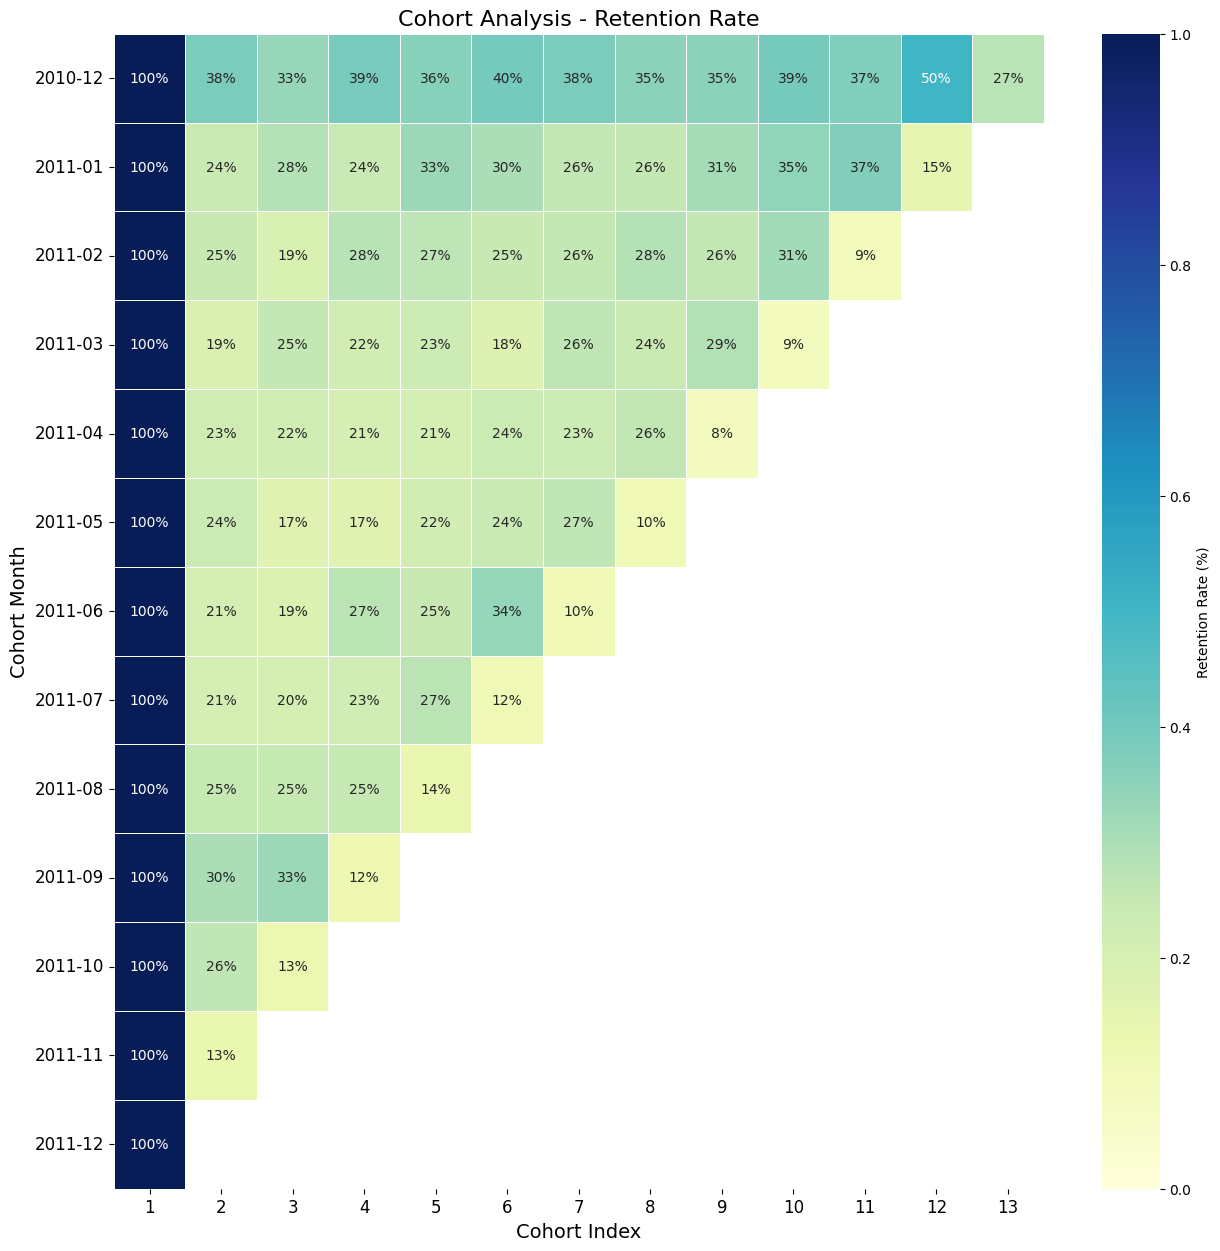

In [ ]:
plt.figure(figsize=(15, 15))

# Plotting the heatmap
sns.heatmap(retention,
            annot=True,
            fmt='.0%',
            cmap='YlGnBu',
            vmin=0.0,
            vmax=1.0,
            linewidths=.5,
            cbar_kws={'label': 'Retention Rate (%)'},
            yticklabels=retention.index.strftime('%Y-%m')
           )

plt.title('Cohort Analysis - Retention Rate', fontsize=16)
plt.ylabel('Cohort Month', fontsize=14)
plt.xlabel('Cohort Index', fontsize=14)
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12)

plt.show()


A cohort analysis, particularly when visualized, provides a comprehensive view of customer behavior over time. When analyzing retention rates through a cohort analysis, the primary goal is to understand how many customers from a specific cohort (usually defined by their first purchase or interaction date) continue to engage or transact with the business over subsequent periods.

Here's how to interpret the visualization from a cohort analysis focused on retention rate:

1. **X-axis (CohortIndex)**: This typically represents the "age" of the cohort or the number of periods since the first interaction of the cohort. If using months, for instance, a CohortIndex of 1 might mean the first month since the cohort's inception, 2 would mean the second month, and so on.

2. **Y-axis (CohortMonth or Start Date)**: Represents the cohorts, usually broken down by the month (or week or any other period) of the first interaction or purchase.

3. **Cell values (color gradient)**: Each cell in the matrix indicates the retention rate. The retention rate is calculated as the number of active users from a cohort in a given month divided by the total number of users in that cohort. The color intensity (usually a gradient) shows the percentage of retention – with darker shades typically indicating higher retention and lighter ones indicating lower retention.

4. **The top-left corner**: This is usually a cohort's first month, so it will always have the highest retention rate (often 100% or close to it since it represents the initial group of users).

To interpret the visualization:

- **Look for Patterns**: Retention rates might decrease as you move rightwards (as cohorts age), which is common since not all customers continue to engage over time.

- **Compare Cohorts**: By looking at similar cohort ages (e.g., the third month for multiple cohorts), you can compare whether newer cohorts are being retained better than older ones. This can indicate the effectiveness of changes in your business strategy, product features, or customer experience over time.

- **Overall Color Gradient**: If the table is generally darker, it indicates higher retention across cohorts. If it lightens rapidly as you move rightwards, it shows customers drop off quickly after their initial interaction.

In essence, a cohort retention visualization provides insights into customer loyalty and stickiness. It can guide strategies to improve customer engagement, highlight the impact of specific initiatives, and forecast future revenue based on retention trends.